In [246]:
from numpy import NaN
import json
from matplotlib.colors import BoundaryNorm, ListedColormap


# Calculate the Euclidean distance
# between two points
from functools import reduce
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from textwrap import wrap


def distance(x1, y1, x2, y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** (1 / 2)


# Function to calculate K closest points
def kClosest(points, target, K):
    pts = []
    position = []
    dist = []
    n = len(points)
    d = []

    for i in range(n):
        d.append({
            "first": distance(points[i][0], points[i][1], target[0], target[1]),
            "second": i
        })

    d = sorted(d, key=lambda l: l["first"])

    for i in range(K):
        pt = []
        dist.append(d[i]["first"])
        position.append(d[i]["second"])
        pt.append(points[d[i]["second"]][0])
        pt.append(points[d[i]["second"]][1])
        pts.append(pt)

    return dict(zip(position, dist))


def load_points(model, article, k):
    f = open(f'../embeddings/low_dimension/{model}_low_dim.json')
    data = json.load(f)
    target = data[article]
    articles_title = list(data.keys())
    corpus_embedding = list(data.values())
    corpus_embedding = corpus_embedding
    closest_points = kClosest(corpus_embedding, target, k)
    near_values = {}
    for k in closest_points.keys():
        # if(closest_points[k] != 0.0):
            near_values[articles_title[k]] = closest_points[k]
    return near_values



In [309]:
def draw_plot(target_title, K):
    # models = ['all_mpnet_base_v2', 'allenai_specter', 'biowordvec',
    #           'generic_fasttext']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'BioWordVec',
    #           'Generic fastText']
    # models = ['all_mpnet_base_v2','allenai_specter','pubmedbert', 'biowordvec','generic_fasttext', 'tfidf', 'bow']
    # model_names = ['all-mpnet-base-v2', 'allenai-specter', 'PubMedBERT','Avg. BioWordVec','Avg. Generic fastText', 'TFIDF', 'BOW']
    models = ['biowordvec','generic_fasttext']
    model_names = ['Avg. BioWordVec','Avg. Generic fastText']
    # models = ['allenai_specter']


    all_points = {model:load_points(model, target_title, k=236) for model in models}
    points = {model:load_points(model, target_title, k=K) for model in models}



    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)


    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in models]
        index_a.append(a)
        all_dist.append(item)

    print(allkey)
    A = np.array(all_dist)
    B= np.array(index_a)
    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 25)) for l in allkey]
    fig, ax = plt.subplots(figsize=(6, 6))
    # my_colors = ['#08c45b', '#eded72','#926dd1']
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A, cbar_kws={'label':'Publication Ranks',
                                                                                  'extend':'max',
                                                                                    'ticks':[1,2]},
                cmap=my_cmap, vmin=1, vmax=2, cbar=True, ax=ax,
                annot_kws={'fontsize': 12, 'color':'black', 'alpha':1}, linewidths=0.08, linecolor='lightgray')
    # ax = sns.heatmap(B, mask=B < 2, cmap='Blues', annot=A,xticklabels=models, yticklabels=allkey, vmin=0, vmax=1, cbar=False, ax=ax)
    # colorbar = ax.collections[0].colorbar
    # colorbar.set_ticks([0,1])
    # colorbar.set_ticklabels(['1', '2'])
    plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
    plt.show()
    return B

{'Simulation-based Ultrasound Training Supported by Annotations, Haptics and Linked Multimodal Views', 'Interactive Visualization of Muscle Activity During Limb Movements: Towards Enhanced Anatomy Learning', 'Student and Teacher Meet in a Shared Virtual Reality: A one-on-one Tutoring System for Anatomy Education'}


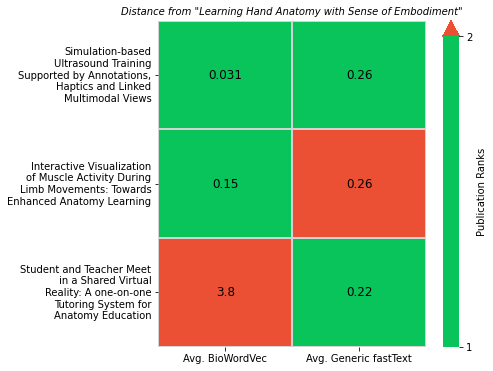

array([[  1,   2],
       [  2,   3],
       [174,   1]])

In [310]:
target_title1 = "Learning Hand Anatomy with Sense of Embodiment"
B = draw_plot(target_title1, 3)
B = np.array(B)
B

In [48]:
with open('../articles_data/all_articles_with_thumbnail_metadata.json') as f:
    papers = json.load(f)

article_titles = [paper['article_title'] for paper in papers]

In [326]:
def create_rank_matrix(target_title, K, drawplot=False):
    # models = ['allenai_specter','all_mpnet_base_v2','biowordvec',
    #           'generic_fasttext', 'TFIDF', 'BOW']
    # model_names = ['allenai_specter','all_mpnet_base_v2','BioWordVec',
    #           'Generic fastText','TFIDF','BOW']

    # model_names = ['BioWordVec','Generic fastText']
    models = ['allenai_specter', 'pubmedbert', 'generic_fasttext']
    model_names = ['allenai_specter','PubMedBERT', 'Avg. Generic fastText']


    all_points = {model:load_points(model, target_title, k=236) for model in models}
    points = {model:load_points(model, target_title, k=K) for model in models}

    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in allkey:
        allkey.remove(target_title)


    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in allkey:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B= np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 30)) for l in allkey]
    # my_colors = ['#08c45b', '#eded72','#926dd1','#6f6dd1', '#bf62b7']
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        print(allkey)
        fig, ax = plt.subplots(figsize=(6, 8))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A, cbar_kws={'label':'Publication Ranks',
                                                                                      'extend':'max',
                                                                                        'ticks':[1,3]},
                    cmap=my_cmap, vmin=1, vmax=3, cbar=True, ax=ax,
                    annot_kws={'fontsize': 12, 'color':'black', 'alpha':1}, linewidths=0.08, linecolor='lightgray')
        # colorbar = ax.collections[0].colorbar
        # colorbar.set_ticks([1,2,3,4,5])
        # colorbar.set_ticklabels(['1','2','3','4','5'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

{'QuantiScale: A Study in Redesigning Interactions for Multi-Touch', 'A Comparative User Study of a 2D and an Autostereoscopic 3D Display for a Tympanoplastic Surgery', 'preha: Establishing Precision Rehabilitation with Visual Analytics', 'Simulation-based Ultrasound Training Supported by Annotations, Haptics and Linked Multimodal Views', 'Challenges and Technologies for Low Cost Wheelchair Simulation', 'Interactive Visualization of Muscle Activity During Limb Movements: Towards Enhanced Anatomy Learning', 'Student and Teacher Meet in a Shared Virtual Reality: A one-on-one Tutoring System for Anatomy Education'}


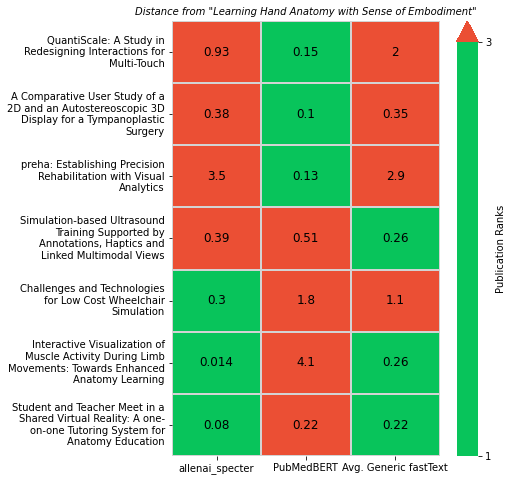

array([[ 21,   3,  52],
       [  4,   1,   4],
       [130,   2, 126],
       [  5,   7,   2],
       [  3,  40,  27],
       [  1, 155,   3],
       [  2,   4,   1]])

In [330]:
target_title1 = "Learning Hand Anatomy with Sense of Embodiment"
B = create_rank_matrix(target_title1, 4, True)
B

In [51]:
import pandas as pd
# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
models = ['all-mpnet-base-v2', 'allenai-specter', 'BioBERT','PubMedBert', 'BioWordVec',
              'Generic fastText']
rank_matrix = []
dist_matrix = []
count = 0
all_cor_mat = []
all_dist_mat = []
# draw_plot(target_title3)
for article in article_titles:
    B = create_rank_matrix(article, K=5)
    # x = A.mean(axis=0)
    # all_dist_mat.append(x)
    df = pd.DataFrame(B)
    cor_B = df.corr(method="spearman")
    all_cor_mat.append(cor_B)


#     dist_matrix.append(A)
#     rank_matrix.append(B)

In [52]:
# x = np.array(all_dist_mat).mean(axis=0)
# x

<AxesSubplot:>

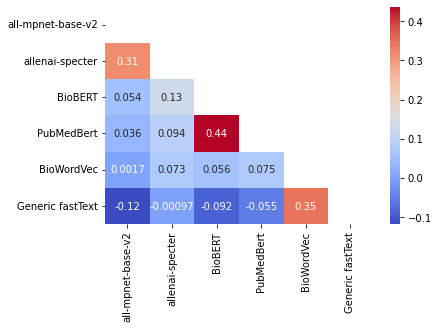

In [53]:
all_cor_mat = np.array(all_cor_mat)
x = np.mean(all_cor_mat, axis=0)
y = pd.DataFrame(x, columns= ['all-mpnet-base-v2', 'allenai-specter', 'BioBERT','PubMedBert', 'BioWordVec',
              'Generic fastText'])
sns.heatmap(y, cmap="coolwarm", mask= np.triu(y), yticklabels=models, annot=y)



In [54]:
import pandas as pd
df = pd.DataFrame(B, columns=['all_mpnet', 'allenai','biowordvec','generic_fast'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask= np.triu(my_r))

ValueError: Shape of passed values is (14, 6), indices imply (14, 4)

In [55]:
import pandas as pd
df = pd.DataFrame(B, columns=['all_mpnet', 'allenai','biobert','pubmedbert','biowordvec','generic_fast','tfidf','bow'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask= np.triu(my_r))

ValueError: Shape of passed values is (14, 6), indices imply (14, 8)

In [56]:
a = np.array(8)
A = np.append(a,B)
A

array([  8, 106,  21, 114, 191,   8,   1, 198,   2, 139, 185,  14,  48,
        43, 100,  76, 208,   3, 105, 173,  36,   2,   4, 181,  12,  65,
        18, 145, 206,   4,   3,  68,  92,  78, 207,   2,  77,   1,   7,
        20,  59, 183, 110,  30,  15,   4,   1,  93, 120, 104,   3, 120,
         3, 139,  73,   7,  14,  37, 165,   1, 168,   2,   4,   0,   0,
        10,   2,   0,   0,   1,   2,   0,   0, 162,   1,   3,   5, 100,
         6,   3,   6, 111, 151,  48,  53])

<AxesSubplot:>

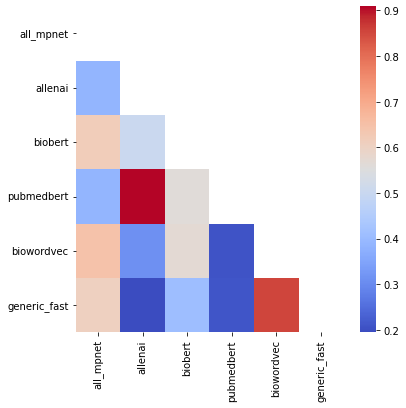

In [68]:
import pandas as pd
df = pd.DataFrame(B, columns=['all_mpnet', 'allenai','biobert','pubmedbert','biowordvec','generic_fast'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask= np.triu(my_r))

In [226]:
def generate_rank_matrix(target_title, K, drawplot=False):
    models = ['allenai_specter','all_mpnet_base_v2','pubmedbert','biowordvec',
              'generic_fasttext', 'tfidf', 'bow']
    model_names = ['all-mpnet-base-v2', 'allenai-specter','PubMedBert', 'Avg. BioWordVec',
              'Avg. Generic fastText','TFIDF','BOW']
    # models = ['biowordvec','generic_fasttext']
    # model_names = ['BioWordVec','Generic fastText']
    # models = ['allenai_specter','all_mpnet_base_v2']
    # model_names = ['allenai_specter','all_mpnet_base_v2']


    all_points = {model:load_points(model, target_title, k=236) for model in models}
    points = {model:load_points(model, target_title, k=K) for model in models}

    articles_from_models = [r for x in list(points.values()) for r in x]


    # print(len(points))
    allkey = reduce(set.union, map(set, map(dict.keys, points.values())))
    if target_title in articles_from_models:
        articles_from_models.remove(target_title)


    d = np.zeros((len(allkey), len(models)))
    all_dist = []
    index_a = []
    for key in articles_from_models:
        item = [points[m][key] if key in points[m] else all_points[m][key] for m in models]
        a = [list(points[m].keys()).index(key) if key in points[m] else list(all_points[m].keys()).index(key) for m in models]
        index_a.append(a)
        all_dist.append(item)

    A = np.array(all_dist)
    B= np.array(index_a)

    avg = np.average(A, axis=0)

    labels = ['\n'.join(wrap(l, 50)) for l in articles_from_models]
    my_colors = ['#08c45b']
    my_cmap = ListedColormap(my_colors)
    my_cmap.set_over('#eb4f34')
    if drawplot:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax = sns.heatmap(B, xticklabels=model_names, yticklabels=labels, annot=A, cbar_kws={'label':'Publication Ranks',
                                                                                      'extend':'max',
                                                                                        'ticks':[1,2]},
                    cmap=my_cmap, vmin=1, vmax=2, cbar=True, ax=ax,
                    annot_kws={'fontsize': 12, 'color':'black', 'alpha':1}, linewidths=0.08, linecolor='lightgray')
        colorbar = ax.collections[0].colorbar
        colorbar.set_ticks([1,2])
        colorbar.set_ticklabels(['1','2'])
        plt.title(label=f'Distance from \"{target_title}\"', fontsize=10, fontstyle='oblique')
        plt.show()
    return B

In [231]:
import pandas as pd
# target_title1 = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# target_title2 = "Visual Analytics in Digital Pathology: Challenges and Opportunities"
# article = "A Framework for Visual Comparison of 4D PC-MRI Aortic Blood Flow Data"
# A, B = draw_plot(article)

# draw_plot(target_title2)
models = ['all-mpnet-base-v2', 'allenai-specter','PubMedBert', 'Avg. BioWordVec',
              'Avg. Generic fastText','TFIDF','BOW']
model_names = ['all-mpnet-base-v2', 'allenai-specter','PubMedBert', 'Avg. BioWordVec',
              'Avg. Generic fastText','TFIDF','BOW']
rank_matrix = []
dist_matrix = []
count = 0
all_mat = []
all_dist_mat = []
# draw_plot(target_title3)
for article in article_titles:
    B = generate_rank_matrix(article, K=6, drawplot=False)
    df = pd.DataFrame(B)
    all_mat.append(df)

In [228]:
R = np.concatenate(np.array(all_mat), axis=0)
R

array([[  0,  14,   9, ...,   4,  23,  19],
       [  1,  15, 222, ...,  12,   9,  27],
       [  2,  20,  52, ...,   8,   1,   7],
       ...,
       [  2,   4, 196, ...,   0,  10,   2],
       [ 65,  18,   4, ..., 206,   4,   3],
       [140,  48, 232, ...,   6,  87,   4]])

<AxesSubplot:>

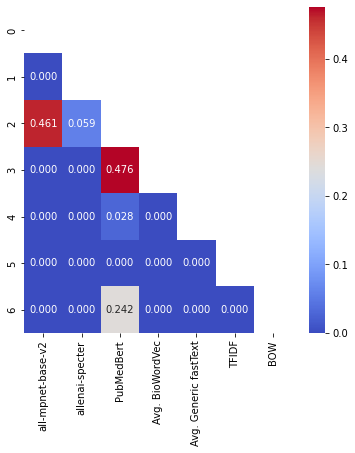

In [234]:
from scipy.stats import spearmanr
pvalues = []
main = []
for i in range(len(model_names)):
    for j in range(len(model_names)):
        rho, pr = spearmanr(R[:,i], R[:,j])
        pvalues.append(pr)
        if j==len(model_names)-1:
            main.append(pvalues)
            pvalues = []
df1 = pd.DataFrame(main, columns=model_names)
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(df1, cmap="coolwarm", mask= np.triu(my_r), annot=True, fmt='.3f')


<AxesSubplot:>

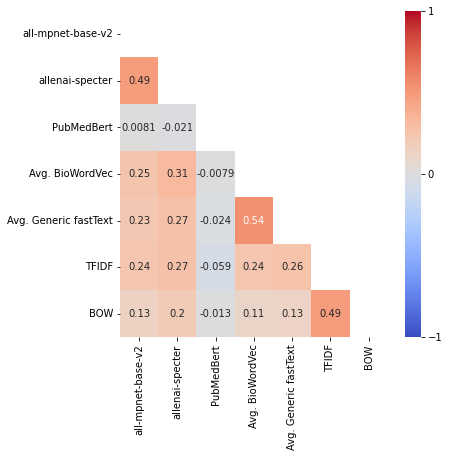

In [230]:
import pandas as pd
df = pd.DataFrame(R, columns=['all-mpnet-base-v2', 'allenai-specter','PubMedBert', 'Avg. BioWordVec',
              'Avg. Generic fastText', 'TFIDF', 'BOW'])
my_r = df.corr(method="spearman")
fig, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(my_r, cmap="coolwarm", mask= np.triu(my_r), annot=my_r, cbar_kws={'ticks':[-1,0,1]}, cbar=True, vmin=-1, vmax=1)